# Supervised Learning: KNNs and Linear Models

We covered the following ML algorithms in morning lecture:
- knn
- linear regression 
- regularization

## import modules 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
#import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn import neighbors
import matplotlib.patches as mpatches
%matplotlib inline

## A few functions for plotting (feel free to ignore)

In [2]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
        plt.show()

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)
    plt.show()

## K-Nearest Neighbour classification 

For this example, we use the iris data set. https://archive.ics.uci.edu/ml/datasets/iris

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".

The data set consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### Get data and print description

In [3]:
# get data and print information about it 

iris = datasets.load_iris() # get data

print('The iris.data has {} samples each of which has {} features. e.g. first two data: {}'
      .format(iris.data.shape[0], iris.data.shape[1], iris.data[:2]))
print('The iris.target has labels (one of {}) for {} samples. e.g. first two labels {}'
      .format(iris.target_names, iris.target.shape[0], iris.target[:2]))

print(iris.DESCR)

The iris.data has 150 samples each of which has 4 features. e.g. first two data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
The iris.target has labels (one of ['setosa' 'versicolor' 'virginica']) for 150 samples. e.g. first two labels [0 0]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0

### Get selected features and targets from iris data set for training

X represents the features and y represents the targets. 

In [4]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

### Plot data 

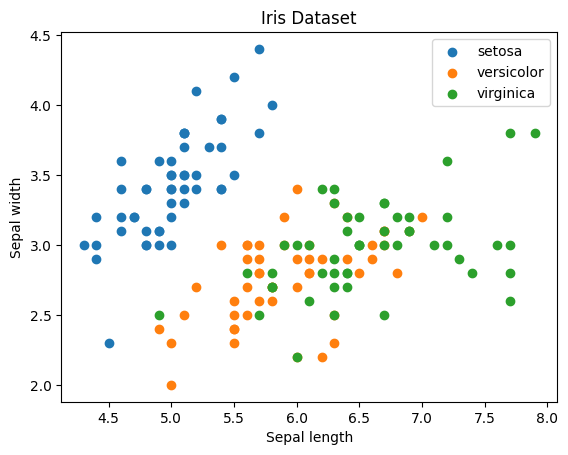

In [5]:
labels={0:'setosa',1:'versicolor',2:'virginica'}
fig,ax=plt.subplots()
for i in range(3):
    ax.scatter(X[y==i, 0], X[y==i, 1],label=labels[i])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Iris Dataset')
ax.legend();

### Build a KNN Classification Model 

In [6]:
from sklearn.neighbors import KNeighborsClassifier # import model 

#### Train/Test Split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state = 0)

#### Train model 

In [8]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

#### Evaluate Model 

In [9]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.68


Below is sklearn's classification report.  This includes alternative classification metrics to accuracy. 

In [10]:
from sklearn.metrics import classification_report  # includes various metrics for evaluating classification models
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        16
  versicolor       0.60      0.65      0.63        23
   virginica       0.56      0.48      0.51        21

    accuracy                           0.68        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.68      0.68      0.68        60



Below we visualize a confusion matrix.

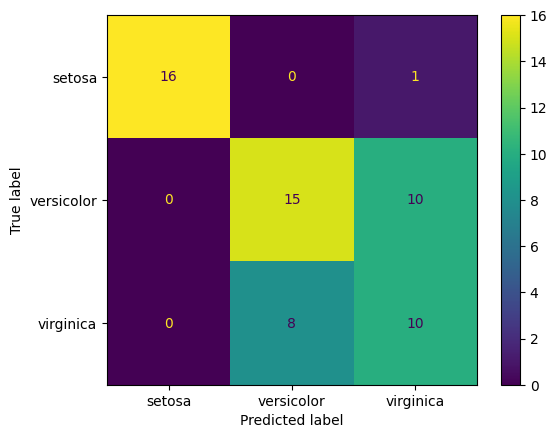

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # computes and visually displays the confusion matrix 
cm=confusion_matrix(y_pred, y_test) #,labels=['setosa','versicolor','virginica'])
cm_display = ConfusionMatrixDisplay(cm,display_labels=['setosa','versicolor','virginica']).plot()

#### Predict with Model 

Finally, we may want to use our model to make predictions on unseen data points.  Below, we demo how this can be done. 

In [12]:
examples = [[5.9,  3.], [4.4, 1.9]]
predictions= knn.predict(examples)

print('Predicted iris type for ', examples, ' is ', 
          [iris.target_names[x] for x in predictions ] )

Predicted iris type for  [[5.9, 3.0], [4.4, 1.9]]  is  ['versicolor', 'setosa']


#### OPTIONAL EXERCISE

In the demo above we trained and evaluated a KNN model with k=10.  Using the Iris dataset as defined in variables X and Y above, train a KNN model with k = 1 and k = 50 and compute the accuracy of each model with testing data.  What is the best value of k: 1,10 or 50?

## Visualizing Decision Boundaries 

### Decision boundaries with synthetic data sets

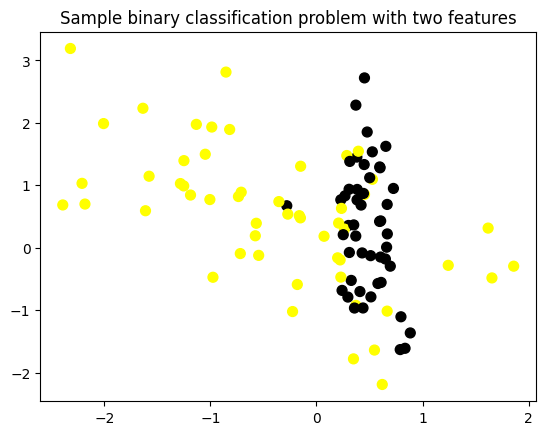

In [13]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two features')

# create synthetic dataset 
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

# plot synthetic dataset
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000']) 
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

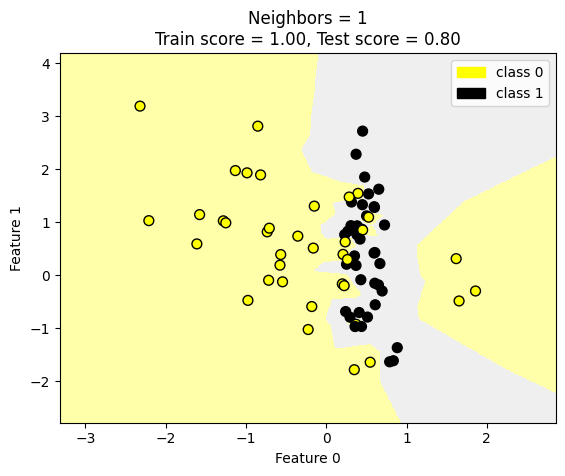

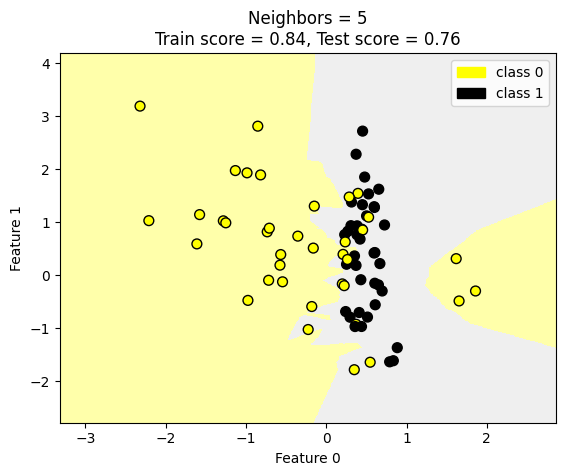

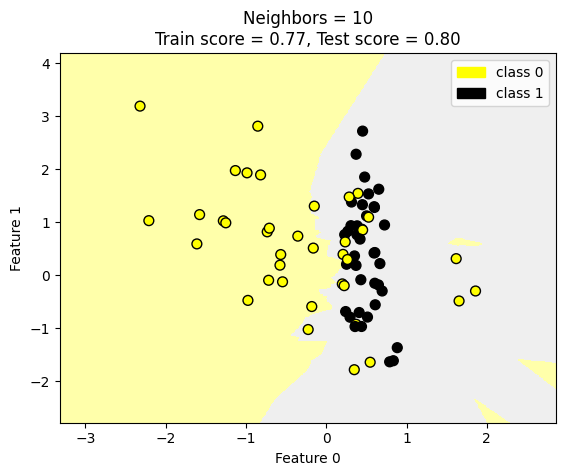

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 5, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 10, 'uniform', X_test, y_test)

#### OPTIONAL EXERCISE

By visually inspecting the data above, what is the best value of k-- 1, 5 or 10? 

## Linear Regression 

### linear regression with synthetic binary data for simple linear regression

#### import modules

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#### make and plot synthetic dataset

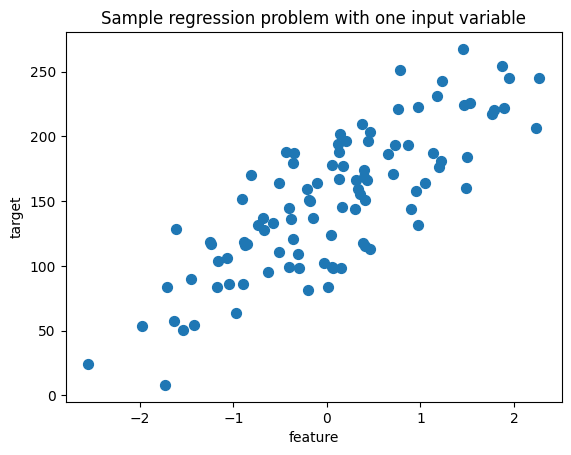

In [16]:
# get data 
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

# plot data 
plt.figure()
plt.title('Sample regression problem with one input variable')
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

#### train test split and model training 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

#### Evaluate model 

In [18]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


#### Plot Model 

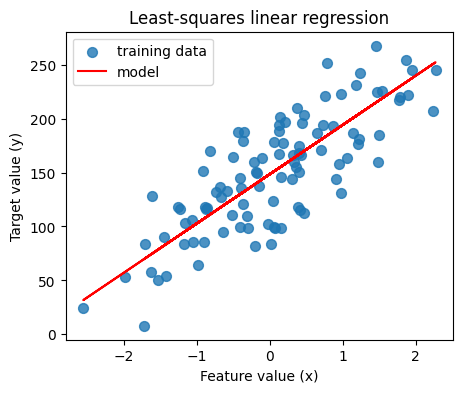

In [19]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8, label='training data')
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-', label='model')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.legend()
plt.show()

### multiple linear regression with the diabetes housing dataset

In [20]:
# Regression with Boston Housing dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print('The diabetes.data has {} samples each of which has {} features. e.g. first two data: {}'
      .format(diabetes.data.shape[0], diabetes.data.shape[1], diabetes.data[:2]))
print('The diabetes.target has values for {} samples. e.g. first two labels {}'
      .format(diabetes.target.shape[0], diabetes.target[:5]))

The diabetes.data has 442 samples each of which has 10 features. e.g. first two data: [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]]
The diabetes.target has values for 442 samples. e.g. first two labels [151.  75. 141. 206. 135.]


In [21]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Exploring our data 

In linear regression, it is good to explore the relationships between your features and targets to see if linear relationships exist or can be engineered. Below we explore this via a few data visualizations. 

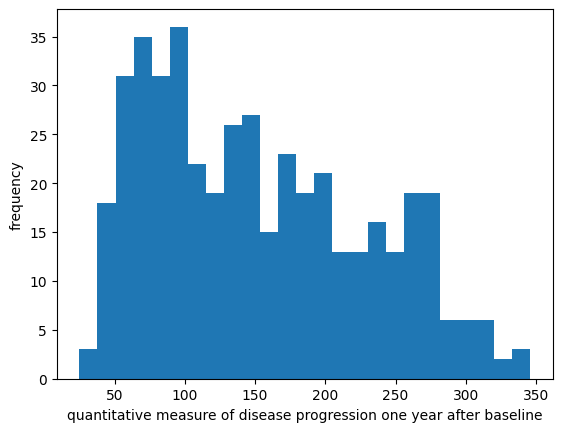

In [22]:
plt.figure()
plt.hist(diabetes.target, bins=25)
plt.xlabel("quantitative measure of disease progression one year after baseline")
plt.ylabel("frequency")
plt.show()

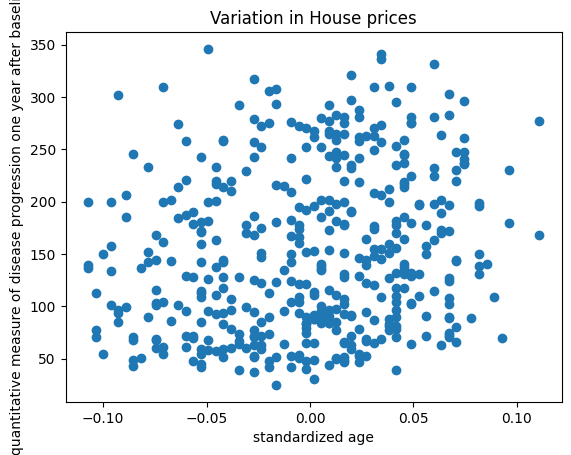

In [23]:
plt.figure()
plt.scatter(diabetes.data[:, 0:1] , diabetes.target, marker='o')
plt.title("Variation in House prices")
plt.xlabel("standardized age")
plt.ylabel("quantitative measure of disease progression one year after baseline")
plt.show()

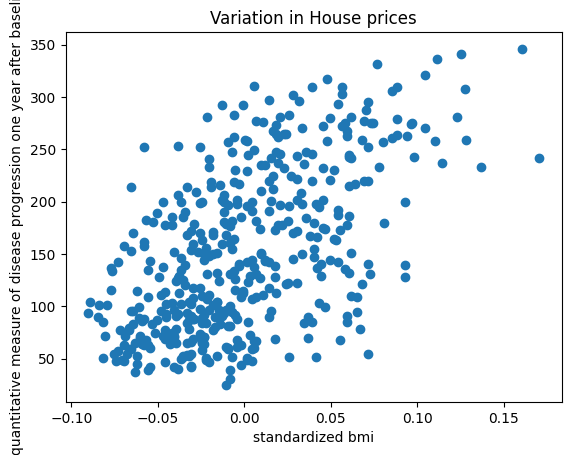

In [24]:
plt.figure()
plt.scatter(diabetes.data[:, 2:3] , diabetes.target, marker='o')
plt.title("Variation in House prices")
plt.xlabel("standardized bmi")
plt.ylabel("quantitative measure of disease progression one year after baseline")
plt.show()

#### train and evaluate model with all features

In [25]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2,
                                                   random_state = 33)
linreg = LinearRegression().fit(X_train, y_train)

print('Boston House dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Boston House dataset
linear model intercept: 154.03704468067593
linear model coeff:
[   -4.56012842  -264.57651284   499.92737379   337.92766753
 -1342.40990212   850.98349897   302.26783891   257.06736509
   942.63808065    32.13441082]
R-squared score (training): 0.516
R-squared score (test): 0.498


#### OPTIONAL EXERCISE

How does simple linear regression compare to multiple linear regression?  In the model above we used all features available.  However, we see in our EDA that there wasn't necessarily a strong linear relationship between all of our features and our target.  

Try building a simple linear regression model where our features is body mass index.  Compute the R^2 coefficient for this model. How do these results compare to the multiple linear regression model we built in the previous cell?


To help get you started, the test/train split is already set up for below. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:, 2:3], diabetes.target, test_size=0.2,
                                                   random_state = 33)

# Regularized Regression

Below we use Ridge Regression to train a model with the Boston Housing dataset.  It is important to standardize your data when using regularization to ensure that the beta coefficients you find are all of similar magnitude. 


Below we choose to standardize or data with the MinMaxScalar.  Please note that there are two functions used, fit_transform and transform.  By performing the fit, we are computing the min and max values of the data provided and storing these values so that the can used to transform data.  Never fit the MinMaxScaler with testing data -- only use training. 

In [27]:
from sklearn.linear_model import Ridge

In [28]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2,
                                                   random_state = 33)

# Note we typically would need to standardize our data.  however, this data comes pre-standardized
# code below is one way we could standardize our data with the min max scaler described above

'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

linreg = Ridge(alpha=1.0).fit(X_train, y_train)

print('Boston House dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Boston House dataset
linear model intercept: 154.2274304362352
linear model coeff:
[  27.98187721  -81.8281942   275.55620249  189.0690446   -12.37624501
  -31.72049693 -151.80765019  114.01093604  235.72998914  103.08512348]
R-squared score (training): 0.421
R-squared score (test): 0.475


#### what is the best value of alpha to use? 

An important hyperparameter when using Ridge regression is alpha.  Below we consider several values of alpha so that we can find optimal performance. 

Alpha: 0.001 R-squared score (test): 0.503
Alpha: 0.01 R-squared score (test): 0.518
Alpha: 0.1 R-squared score (test): 0.530
Alpha: 1 R-squared score (test): 0.475
Alpha: 10 R-squared score (test): 0.172
Alpha: 100 R-squared score (test): 0.016
Alpha: 1000 R-squared score (test): -0.006
Alpha: 10000 R-squared score (test): -0.009


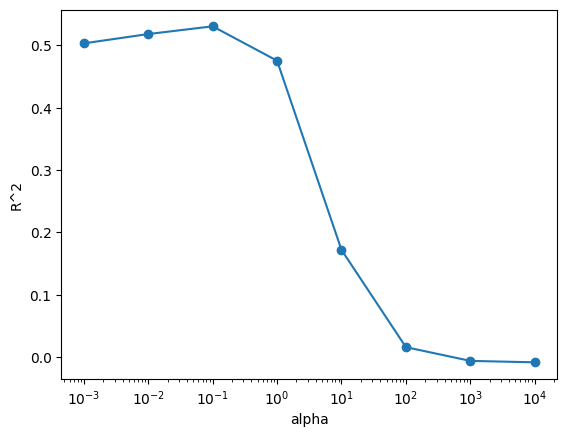

In [29]:
# what is the best value of alpha to use? 
r2s = []
alphas=[0.001,0.01,0.1,1,10,100,1000,10000]
for alpha in alphas:
    linreg = Ridge(alpha=alpha).fit(X_train, y_train)
    r2s.append( linreg.score(X_test, y_test) )
    print('Alpha: {} R-squared score (test): {:.3f}'.format(alpha,r2s[-1]))
    
fig,ax=plt.subplots()
ax.plot(alphas,r2s)
ax.scatter(alphas,r2s)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('R^2');

### Optional Excercise 

Copy and modify the code above to see how the performance changes when we use Lasso Regression instead of Ridge for various values of alpha.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

# Part 2 

The remainder of the machine learning methods will be covered in the afternoon session:

- logistic regression 
- support vector machines
- naive bayes
- decision tree based models

# Logistic Regression

### Cancer Dataset

In [30]:
# Regression with breast cancer dataset
cancer = load_breast_cancer()
print('The cancer.data has {} samples each of which has {} features. e.g. first two data: {}'
      .format(cancer.data.shape[0], cancer.data.shape[1], cancer.data[:2]))
print('The cancer.target has lables (one of {}) for {} samples. e.g. first two labels {}'
      .format(cancer.target_names, cancer.target.shape[0], cancer.target[:2]))

The cancer.data has 569 samples each of which has 30 features. e.g. first two data: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
The cancer.target has lables (one of ['malignant' 'benign']) for 569 samples. e.g. first two labels [0 0]


In [31]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Train and evaluate logistic regression model

Note the parameter C when training the Logistic Regression is similar to alpha used in ridge regression.  However, C and alpha have an inverse relation ship.  The smaller the value of C, the stronger the regularization is.  The regularization term is why standardizing the data is needed when training this model. 

In [32]:
# Logistic regression
# Logistic regression for binary classification )
from sklearn.linear_model import LogisticRegression

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer[:, 20:30], y_cancer,
                                                   random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(C=100).fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.99


## Support Vector Machine (SVMs)

In [33]:
# Support vector machine
# Linear Support Vector Machine
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Note: you likely received a ConvergenceWarning from the cell above.  We included this cell to highlight the fact that this is another example of where standardizing data can help.  In general, standardized data makes the training process easier, specifically when your training process involves using a numerical optimizer to optimize a loss function.  Below we train the model again, but with standardized data.  

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LinearSVC().fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('Polynomial-kernel (degree=3) SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Polynomial-kernel (degree=3) SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
Polynomial-kernel (degree=3) SVC (with MinMax scaling) training set accuracy: 0.98
Polynomial-kernel (degree=3) SVC (with MinMax scaling) test set accuracy: 0.97


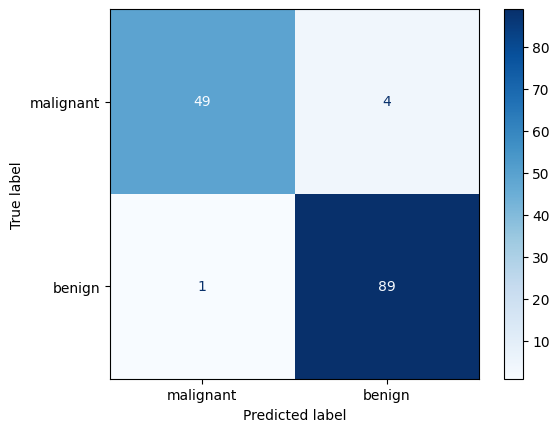

In [35]:
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test,
                                                   display_labels=cancer.target_names,
                                                   cmap=plt.cm.Blues,normalize=None)

### Multi-class classification with linear models and SVMs

In [36]:
# Multi-class classification with linear models
# LinearSVC with M classes generates M one vs rest classifiers.
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LinearSVC(C=5, random_state = 67).fit(X_train_scaled, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Coefficients:
 [[-0.64222849  1.39836013 -2.24842395 -2.02760334]
 [-0.19627313 -2.25948035  1.99199278 -1.80429646]
 [-0.85022646 -1.40063347  4.21927455  4.11948534]]
Intercepts:
 [ 0.74078086  0.57847221 -4.40623807]
Accuracy of Linear SVC classifier on training set: 0.95
Accuracy of Linear SVC classifier on test set: 0.95


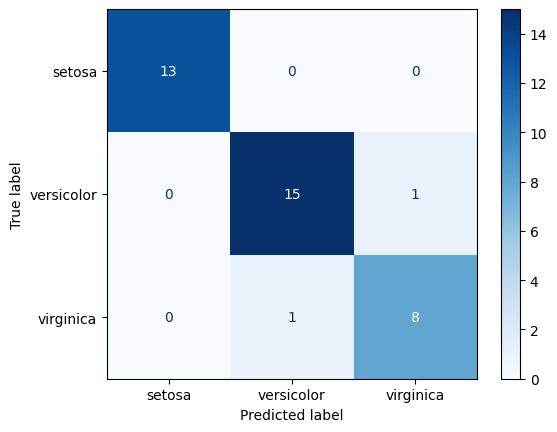

In [37]:
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test,
                                                   display_labels=iris.target_names,
                                                   cmap=plt.cm.Blues,normalize=None)

### SVMs and the kernel trick

In [38]:
#RBF Kernel normlized 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='rbf',C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


#### OPTIONAL EXERCISE

Try building another SVC model except instead of using the rbf kernel, use the polynomial kernel of degree 5:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

How do the results compare? 